In [39]:
import pandas as pd
import matplotlib.pyplot as plt


In [40]:
# read data
big_frame = pd.read_csv("big_frame.csv", index_col='Unnamed: 0')

In [41]:
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)

In [42]:
big_frame.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,squadName
0,2021-08-13,20:30,Bundesliga,Matchweek 1,Fri,Away,D,1.0,1.0,M'Gladbach,2.6,2.0,65.0,22925.0,Manuel Neuer,4-2-3-1,Marco Fritz,Match Report,NaN,Bayern Munich
1,2021-08-17,20:30,DFL-Supercup,DFL-Supercup,Tue,Away,W,3.0,1.0,Dortmund,NaN,NaN,51.0,NaN,Manuel Neuer,4-2-3-1,Sascha Stegemann,Match Report,NaN,Bayern Munich
2,2021-08-22,17:30,Bundesliga,Matchweek 2,Sun,Home,W,3.0,2.0,Köln,2.6,0.8,57.0,20000.0,Manuel Neuer,4-2-3-1,Martin Petersen,Match Report,NaN,Bayern Munich
3,2021-08-25,20:15,DFB-Pokal,First round,Wed,Away,W,12.0,0.0,Bremer SV,NaN,NaN,68.0,10093.0,Thomas Müller,4-2-3-1,Nicolas Winter,Match Report,NaN,Bayern Munich
4,2021-08-28,18:30,Bundesliga,Matchweek 3,Sat,Home,W,5.0,0.0,Hertha BSC,3.0,0.4,62.0,25000.0,Manuel Neuer,4-2-3-1,Sven Jablonski,Match Report,NaN,Bayern Munich


In [43]:
big_frame.shape

(4363, 20)

In [44]:
big_frame.describe()

,xG,xGA,Poss,Attendance
count,3424.000000,3424.000000,3818.000000,3664.000000
mean,1.345298,1.311303,50.797538,24366.305404
std,0.799058,0.780079,11.308318,17599.501278
min,0.000000,0.000000,19.000000,250.000000
25%,0.700000,0.700000,43.000000,10093.000000
50%,1.200000,1.200000,51.000000,20000.000000
75%,1.800000,1.700000,59.000000,35500.000000
max,5.300000,5.300000,83.000000,88512.000000


In [45]:
big_frame.dtypes

Date             object
Time             object
Comp             object
Round            object
Day              object
Venue            object
Result           object
GF               object
GA               object
Opponent         object
xG              float64
xGA             float64
Poss            float64
Attendance      float64
Captain          object
Formation        object
Referee          object
Match Report     object
Notes            object
squadName        object
dtype: object

In [46]:
# check duplicated values
big_frame.duplicated().sum()

0

In [47]:
# check nan values
big_frame.isna().sum()

Date               0
Time             163
Comp               0
Round              0
Day                0
Venue              0
Result           491
GF               490
GA               490
Opponent           0
xG               939
xGA              939
Poss             545
Attendance       699
Captain          492
Formation        492
Referee          492
Match Report       4
Notes           4115
squadName          0
dtype: int64

In [48]:
# fill nan notes values notes with "-"
big_frame["Notes"] = big_frame["Notes"].fillna("-")

# fill nan attendance values notes with 0
big_frame["Attendance"] = big_frame["Attendance"].fillna(0)

In [49]:
# what rows have nan values
big_frame[big_frame.isna().any(axis=1)]

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,squadName
1,2021-08-17,20:30,DFL-Supercup,DFL-Supercup,Tue,Away,W,3.0,1.0,Dortmund,NaN,NaN,51.0,0.0,Manuel Neuer,4-2-3-1,Sascha Stegemann,Match Report,-,Bayern Munich
3,2021-08-25,20:15,DFB-Pokal,First round,Wed,Away,W,12.0,0.0,Bremer SV,NaN,NaN,68.0,10093.0,Thomas Müller,4-2-3-1,Nicolas Winter,Match Report,-,Bayern Munich
14,2021-10-27,20:45,DFB-Pokal,Second round,Wed,Away,L,0.0,5.0,M'Gladbach,NaN,NaN,62.0,48500.0,Manuel Neuer,4-2-3-1,Tobias Stieler,Match Report,-,Bayern Munich
43,2022-04-23,18:30,Bundesliga,Matchweek 31,Sat,Home,W,3.0,1.0,Dortmund,NaN,NaN,58.0,75000.0,Manuel Neuer,4-2-3-1,Daniel Siebert,Match Report,-,Bayern Munich
44,2022-04-30,15:30,Bundesliga,Matchweek 32,Sat,Away,NaN,NaN,NaN,Mainz 05,NaN,NaN,NaN,0.0,NaN,NaN,NaN,Head-to-Head,-,Bayern Munich
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,2022-04-27,18:00,Serie A,Matchweek 20,Wed,Away,NaN,NaN,NaN,Salernitana,NaN,NaN,NaN,0.0,NaN,NaN,NaN,Head-to-Head,-,Venezia
37,2022-05-01,NaN,Serie A,Matchweek 35,Sun,Away,NaN,NaN,NaN,Juventus,NaN,NaN,NaN,0.0,NaN,NaN,NaN,Head-to-Head,-,Venezia
38,2022-05-08,NaN,Serie A,Matchweek 36,Sun,Home,NaN,NaN,NaN,Bologna,NaN,NaN,NaN,0.0,NaN,NaN,NaN,Head-to-Head,-,Venezia
39,2022-05-15,NaN,Serie A,Matchweek 37,Sun,Away,NaN,NaN,NaN,Roma,NaN,NaN,NaN,0.0,NaN,NaN,NaN,Head-to-Head,-,Venezia


In [50]:
# show all comps
comp = list(big_frame.Comp.unique())
comp

['Bundesliga',
 'DFL-Supercup',
 'DFB-Pokal',
 'Champions Lg',
 'Europa Lg',
 'Conf Lg',
 'Community Shield',
 'Premier League',
 'EFL Cup',
 'FA Cup',
 'Super Cup',
 'La Liga',
 'Copa del Rey',
 'Supercopa de España',
 'Trophée des Champions',
 'Ligue 1',
 'Coupe de France',
 'Serie A',
 'Supercoppa Italiana',
 'Coppa Italia']

In [51]:
# filter by home leagues only
comp = ['Bundesliga','Premier League','La Liga','Ligue 1','Serie A']
only_leagues = big_frame[big_frame["Comp"].isin(comp)]

In [52]:
# show na values
only_leagues.isna().sum()

Date              0
Time            160
Comp              0
Round             0
Day               0
Venue             0
Result          462
GF              462
GA              462
Opponent          0
xG              498
xGA             498
Poss            462
Attendance        0
Captain         462
Formation       462
Referee         462
Match Report      4
Notes             0
squadName         0
dtype: int64

In [53]:
# what rows have nan values
only_leagues[only_leagues.isna().any(axis=1)]

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,squadName
43,2022-04-23,18:30,Bundesliga,Matchweek 31,Sat,Home,W,3.0,1.0,Dortmund,NaN,NaN,58.0,75000.0,Manuel Neuer,4-2-3-1,Daniel Siebert,Match Report,-,Bayern Munich
44,2022-04-30,15:30,Bundesliga,Matchweek 32,Sat,Away,NaN,NaN,NaN,Mainz 05,NaN,NaN,NaN,0.0,NaN,NaN,NaN,Head-to-Head,-,Bayern Munich
45,2022-05-08,17:30,Bundesliga,Matchweek 33,Sun,Home,NaN,NaN,NaN,Stuttgart,NaN,NaN,NaN,0.0,NaN,NaN,NaN,Head-to-Head,-,Bayern Munich
46,2022-05-14,15:30,Bundesliga,Matchweek 34,Sat,Away,NaN,NaN,NaN,Wolfsburg,NaN,NaN,NaN,0.0,NaN,NaN,NaN,Head-to-Head,-,Bayern Munich
42,2022-04-23,18:30,Bundesliga,Matchweek 31,Sat,Away,L,1.0,3.0,Bayern Munich,NaN,NaN,42.0,75000.0,Marco Reus,4-2-3-1,Daniel Siebert,Match Report,-,Dortmund
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,2022-04-27,18:00,Serie A,Matchweek 20,Wed,Away,NaN,NaN,NaN,Salernitana,NaN,NaN,NaN,0.0,NaN,NaN,NaN,Head-to-Head,-,Venezia
37,2022-05-01,NaN,Serie A,Matchweek 35,Sun,Away,NaN,NaN,NaN,Juventus,NaN,NaN,NaN,0.0,NaN,NaN,NaN,Head-to-Head,-,Venezia
38,2022-05-08,NaN,Serie A,Matchweek 36,Sun,Home,NaN,NaN,NaN,Bologna,NaN,NaN,NaN,0.0,NaN,NaN,NaN,Head-to-Head,-,Venezia
39,2022-05-15,NaN,Serie A,Matchweek 37,Sun,Away,NaN,NaN,NaN,Roma,NaN,NaN,NaN,0.0,NaN,NaN,NaN,Head-to-Head,-,Venezia


In [54]:
# show match report unique values
only_leagues["Match Report"].unique()

array(['Match Report', 'Head-to-Head', nan], dtype=object)

In [55]:
# show notes unique values
only_leagues["Notes"].unique()

array(['-', "Match awarded to M'Gladbach", 'Match Postponed'],
      dtype=object)

In [56]:
# if match report equals "head to head" match is not played. Skip today matches. Skip postponed matches.
only_league_filt = only_leagues[(only_leagues["Match Report"] != 'Head-to-Head') & (only_leagues["Date"] != '2022-04-23') & (only_leagues["Notes"] != 'Match Postponed')]
only_league_filt

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,squadName
0,2021-08-13,20:30,Bundesliga,Matchweek 1,Fri,Away,D,1.0,1.0,M'Gladbach,2.6,2.0,65.0,22925.0,Manuel Neuer,4-2-3-1,Marco Fritz,Match Report,-,Bayern Munich
2,2021-08-22,17:30,Bundesliga,Matchweek 2,Sun,Home,W,3.0,2.0,Köln,2.6,0.8,57.0,20000.0,Manuel Neuer,4-2-3-1,Martin Petersen,Match Report,-,Bayern Munich
4,2021-08-28,18:30,Bundesliga,Matchweek 3,Sat,Home,W,5.0,0.0,Hertha BSC,3.0,0.4,62.0,25000.0,Manuel Neuer,4-2-3-1,Sven Jablonski,Match Report,-,Bayern Munich
5,2021-09-11,18:30,Bundesliga,Matchweek 4,Sat,Away,W,4.0,1.0,RB Leipzig,4.2,0.5,48.0,34000.0,Manuel Neuer,4-2-3-1,Deniz Aytekin,Match Report,-,Bayern Munich
7,2021-09-18,15:30,Bundesliga,Matchweek 5,Sat,Home,W,7.0,0.0,Bochum,4.5,1.0,69.0,25000.0,Manuel Neuer,4-2-3-1,Tobias Welz,Match Report,-,Bayern Munich
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,2022-03-14,20:45,Serie A,Matchweek 29,Mon,Away,L,0,1,Lazio,0.3,1.4,34.0,18000.0,Marco Modolo,4-3-2-1,Gianluca Manganiello,Match Report,-,Venezia
31,2022-03-20,12:30,Serie A,Matchweek 30,Sun,Home,L,0,2,Sampdoria,1.2,1.6,47.0,7591.0,Pietro Ceccaroni,4-2-3-1,Daniele Orsato,Match Report,-,Venezia
32,2022-04-02,15:00,Serie A,Matchweek 31,Sat,Away,L,0,1,Spezia,1.0,1.2,47.0,0.0,Pietro Ceccaroni,4-3-3,Daniele Doveri,Match Report,-,Venezia
33,2022-04-10,15:00,Serie A,Matchweek 32,Sun,Home,L,1,2,Udinese,1.3,2.3,52.0,0.0,Marco Modolo,4-3-2-1,Marco Guida,Match Report,-,Venezia


In [57]:
# what rows have nan values
only_league_filt[only_league_filt.isna().any(axis=1)]

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,squadName


In [58]:
only_league_filt.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,squadName
0,2021-08-13,20:30,Bundesliga,Matchweek 1,Fri,Away,D,1.0,1.0,M'Gladbach,2.6,2.0,65.0,22925.0,Manuel Neuer,4-2-3-1,Marco Fritz,Match Report,-,Bayern Munich
2,2021-08-22,17:30,Bundesliga,Matchweek 2,Sun,Home,W,3.0,2.0,Köln,2.6,0.8,57.0,20000.0,Manuel Neuer,4-2-3-1,Martin Petersen,Match Report,-,Bayern Munich
4,2021-08-28,18:30,Bundesliga,Matchweek 3,Sat,Home,W,5.0,0.0,Hertha BSC,3.0,0.4,62.0,25000.0,Manuel Neuer,4-2-3-1,Sven Jablonski,Match Report,-,Bayern Munich
5,2021-09-11,18:30,Bundesliga,Matchweek 4,Sat,Away,W,4.0,1.0,RB Leipzig,4.2,0.5,48.0,34000.0,Manuel Neuer,4-2-3-1,Deniz Aytekin,Match Report,-,Bayern Munich
7,2021-09-18,15:30,Bundesliga,Matchweek 5,Sat,Home,W,7.0,0.0,Bochum,4.5,1.0,69.0,25000.0,Manuel Neuer,4-2-3-1,Tobias Welz,Match Report,-,Bayern Munich


In [59]:
only_league_filt.describe()

,xG,xGA,Poss,Attendance
count,3154.000000,3154.000000,3154.000000,3154.000000
mean,1.324001,1.324001,50.000317,22926.703234
std,0.786811,0.786811,11.098026,17362.938334
min,0.000000,0.000000,19.000000,0.000000
25%,0.700000,0.700000,42.000000,9881.000000
50%,1.200000,1.200000,50.000000,18063.000000
75%,1.800000,1.800000,58.000000,32236.000000
max,5.300000,5.300000,81.000000,86422.000000


In [60]:
only_league_filt

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,squadName
0,2021-08-13,20:30,Bundesliga,Matchweek 1,Fri,Away,D,1.0,1.0,M'Gladbach,2.6,2.0,65.0,22925.0,Manuel Neuer,4-2-3-1,Marco Fritz,Match Report,-,Bayern Munich
2,2021-08-22,17:30,Bundesliga,Matchweek 2,Sun,Home,W,3.0,2.0,Köln,2.6,0.8,57.0,20000.0,Manuel Neuer,4-2-3-1,Martin Petersen,Match Report,-,Bayern Munich
4,2021-08-28,18:30,Bundesliga,Matchweek 3,Sat,Home,W,5.0,0.0,Hertha BSC,3.0,0.4,62.0,25000.0,Manuel Neuer,4-2-3-1,Sven Jablonski,Match Report,-,Bayern Munich
5,2021-09-11,18:30,Bundesliga,Matchweek 4,Sat,Away,W,4.0,1.0,RB Leipzig,4.2,0.5,48.0,34000.0,Manuel Neuer,4-2-3-1,Deniz Aytekin,Match Report,-,Bayern Munich
7,2021-09-18,15:30,Bundesliga,Matchweek 5,Sat,Home,W,7.0,0.0,Bochum,4.5,1.0,69.0,25000.0,Manuel Neuer,4-2-3-1,Tobias Welz,Match Report,-,Bayern Munich
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,2022-03-14,20:45,Serie A,Matchweek 29,Mon,Away,L,0,1,Lazio,0.3,1.4,34.0,18000.0,Marco Modolo,4-3-2-1,Gianluca Manganiello,Match Report,-,Venezia
31,2022-03-20,12:30,Serie A,Matchweek 30,Sun,Home,L,0,2,Sampdoria,1.2,1.6,47.0,7591.0,Pietro Ceccaroni,4-2-3-1,Daniele Orsato,Match Report,-,Venezia
32,2022-04-02,15:00,Serie A,Matchweek 31,Sat,Away,L,0,1,Spezia,1.0,1.2,47.0,0.0,Pietro Ceccaroni,4-3-3,Daniele Doveri,Match Report,-,Venezia
33,2022-04-10,15:00,Serie A,Matchweek 32,Sun,Home,L,1,2,Udinese,1.3,2.3,52.0,0.0,Marco Modolo,4-3-2-1,Marco Guida,Match Report,-,Venezia


In [61]:
only_league_filt.dtypes

Date             object
Time             object
Comp             object
Round            object
Day              object
Venue            object
Result           object
GF               object
GA               object
Opponent         object
xG              float64
xGA             float64
Poss            float64
Attendance      float64
Captain          object
Formation        object
Referee          object
Match Report     object
Notes            object
squadName        object
dtype: object

In [62]:
# check why goals for and against are object 
only_league_filt["GF"].unique()

array(['1.0', '3.0', '5.0', '4.0', '7.0', '2.0', '0.0', '6.0', '0', '2',
       '3', '1', '6', '4', '5', '7'], dtype=object)

In [63]:
# check why goals for and against are object 
only_league_filt["GA"].unique()

array(['1.0', '2.0', '0.0', '4.0', '3.0', '5.0', '0', '1', '2', '5', '4',
       '3', '6.0', '7', '6', '7.0'], dtype=object)

In [64]:
# set GA and GF to float values
only_league_filt[["GF","GA"]] = only_league_filt[["GF","GA"]].apply(pd.to_numeric)

C:\Users\Formalizacion37\Documents\sportsanalytics\environments\lineup_performances\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [65]:
# calculate xG diff
only_league_filt["xG_dif"] = only_league_filt["xG"] - only_league_filt["xGA"]

C:\Users\FORMAL~1\AppData\Local\Temp/ipykernel_21048/1899003986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_league_filt["xG_dif"] = only_league_filt["xG"] - only_league_filt["xGA"]


In [66]:
only_league_filt.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,squadName,xG_dif
0,2021-08-13,20:30,Bundesliga,Matchweek 1,Fri,Away,D,1.0,1.0,M'Gladbach,2.6,2.0,65.0,22925.0,Manuel Neuer,4-2-3-1,Marco Fritz,Match Report,-,Bayern Munich,0.6
2,2021-08-22,17:30,Bundesliga,Matchweek 2,Sun,Home,W,3.0,2.0,Köln,2.6,0.8,57.0,20000.0,Manuel Neuer,4-2-3-1,Martin Petersen,Match Report,-,Bayern Munich,1.8
4,2021-08-28,18:30,Bundesliga,Matchweek 3,Sat,Home,W,5.0,0.0,Hertha BSC,3.0,0.4,62.0,25000.0,Manuel Neuer,4-2-3-1,Sven Jablonski,Match Report,-,Bayern Munich,2.6
5,2021-09-11,18:30,Bundesliga,Matchweek 4,Sat,Away,W,4.0,1.0,RB Leipzig,4.2,0.5,48.0,34000.0,Manuel Neuer,4-2-3-1,Deniz Aytekin,Match Report,-,Bayern Munich,3.7
7,2021-09-18,15:30,Bundesliga,Matchweek 5,Sat,Home,W,7.0,0.0,Bochum,4.5,1.0,69.0,25000.0,Manuel Neuer,4-2-3-1,Tobias Welz,Match Report,-,Bayern Munich,3.5


In [67]:
only_league_filt.groupby("Comp").sum()

,GF,GA,xG,xGA,Poss,Attendance,xG_dif
Comp,,,,,,,
Bundesliga,824.0,824.0,789.4,789.4,27100.0,10019796.0,2.109424e-15
La Liga,830.0,830.0,811.2,811.2,32900.0,14451886.0,4.440892e-16
Ligue 1,899.0,899.0,855.7,855.7,33001.0,13266926.0,-2.886580e-15
Premier League,895.0,895.0,864.6,864.6,32100.0,25149008.0,4.440892e-16
Serie A,917.0,917.0,855.0,855.0,32600.0,9423206.0,2.220446e-15


In [68]:
only_league_filt.groupby("Comp").mean()

,GF,GA,xG,xGA,Poss,Attendance,xG_dif
Comp,,,,,,,
Bundesliga,1.520295,1.520295,1.456458,1.456458,50.000000,18486.708487,3.891926e-18
La Liga,1.261398,1.261398,1.232827,1.232827,50.000000,21963.352584,6.749076e-19
Ligue 1,1.362121,1.362121,1.296515,1.296515,50.001515,20101.403030,-4.373606e-18
Premier League,1.394081,1.394081,1.346729,1.346729,50.000000,39172.909657,6.917277e-19
Serie A,1.406442,1.406442,1.311350,1.311350,50.000000,14452.769939,3.405592e-18


In [69]:
only_league_filt.groupby("squadName").mean().sort_values("Attendance", ascending=False).head(20)

,GF,GA,xG,xGA,Poss,Attendance,xG_dif
squadName,,,,,,,
Manchester Utd,1.575758,1.454545,1.481818,1.393939,52.545455,54793.121212,0.087879
West Ham,1.575758,1.303030,1.348485,1.296970,48.333333,49521.121212,0.051515
Tottenham,1.750000,1.187500,1.656250,1.109375,51.718750,48053.812500,0.546875
Arsenal,1.531250,1.218750,1.562500,1.178125,52.468750,47407.781250,0.384375
Newcastle Utd,1.121212,1.666667,1.000000,1.424242,39.878788,46069.484848,-0.424242
Manchester City,2.343750,0.625000,2.243750,0.703125,67.500000,44166.781250,1.540625
Liverpool,2.593750,0.687500,2.400000,0.950000,61.968750,44165.875000,1.450000
Aston Villa,1.354839,1.483871,1.154839,1.245161,46.387097,41131.322581,-0.090323
Leeds United,1.187500,2.125000,1.290625,1.809375,53.968750,38845.343750,-0.518750


In [70]:
only_league_filt.groupby("squadName").mean().sort_values("Poss", ascending=False).head(20)

,GF,GA,xG,xGA,Poss,Attendance,xG_dif
squadName,,,,,,,
Manchester City,2.343750,0.625000,2.243750,0.703125,67.500000,44166.781250,1.540625
Bayern Munich,2.966667,0.966667,2.640000,0.960000,64.200000,23206.166667,1.680000
Barcelona,1.906250,1.000000,1.759375,0.981250,64.031250,38255.375000,0.778125
Paris S G,2.272727,0.909091,1.912121,1.012121,62.454545,32764.727273,0.900000
Liverpool,2.593750,0.687500,2.400000,0.950000,61.968750,44165.875000,1.450000
Marseille,1.666667,1.000000,1.587879,1.039394,61.090909,34897.727273,0.548485
Real Madrid,2.090909,0.878788,1.924242,1.139394,60.515152,32139.151515,0.784848
Chelsea,2.129032,0.870968,1.716129,0.961290,60.451613,38113.612903,0.754839
Sevilla,1.484848,0.818182,1.166667,1.030303,59.333333,26447.515152,0.136364


In [71]:
# set col of matchweek
only_league_filt["Matchweek"] = only_league_filt["Round"].apply(lambda x: int(x.split(" ")[1]))
# set col of matchweek + opponent
only_league_filt["Matchweek_rival"] = only_league_filt["Matchweek"].apply(lambda x: str(x)) + "_" + only_league_filt["Opponent"].apply(lambda x: x[:3].upper())

C:\Users\FORMAL~1\AppData\Local\Temp/ipykernel_21048/1565416339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_league_filt["Matchweek"] = only_league_filt["Round"].apply(lambda x: int(x.split(" ")[1]))
C:\Users\FORMAL~1\AppData\Local\Temp/ipykernel_21048/1565416339.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_league_filt["Matchweek_rival"] = only_league_filt["Matchweek"].apply(lambda x: str(x)) + "_" + only_league_filt["Opponent"].apply(lambda x: x[:3].upper())


In [72]:
only_league_filt[only_league_filt["squadName"] == "Manchester Utd"].sort_values(by="Matchweek", ascending=True).reset_index()

,index,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,squadName,xG_dif,Matchweek,Matchweek_rival
0,0,2021-08-14,12:30,Premier League,Matchweek 1,Sat,Home,W,5.0,1.0,Leeds United,1.5,0.6,49.0,72732.0,Harry Maguire,4-2-3-1,Paul Tierney,Match Report,-,Manchester Utd,0.9,1,1_LEE
1,1,2021-08-22,14:00,Premier League,Matchweek 2,Sun,Away,D,1.0,1.0,Southampton,1.4,0.8,62.0,32000.0,Harry Maguire,4-2-3-1,Craig Pawson,Match Report,-,Manchester Utd,0.6,2,2_SOU
2,2,2021-08-29,16:30,Premier League,Matchweek 3,Sun,Away,W,1.0,0.0,Wolves,0.6,1.8,56.0,30621.0,Harry Maguire,4-2-3-1,Mike Dean,Match Report,-,Manchester Utd,-1.2,3,3_WOL
3,3,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Home,W,4.0,1.0,Newcastle Utd,2.1,0.7,64.0,72732.0,Harry Maguire,4-2-3-1,Anthony Taylor,Match Report,-,Manchester Utd,1.4,4,4_NEW
4,5,2021-09-19,14:00,Premier League,Matchweek 5,Sun,Away,W,2.0,1.0,West Ham,1.8,1.6,61.0,60000.0,Harry Maguire,4-2-3-1,Martin Atkinson,Match Report,-,Manchester Utd,0.2,5,5_WES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,38,2022-03-12,17:30,Premier League,Matchweek 29,Sat,Home,W,3.0,2.0,Tottenham,1.1,1.3,43.0,73458.0,Harry Maguire,4-2-3-1,Jonathan Moss,Match Report,-,Manchester Utd,-0.2,29,29_TOT
29,43,2022-04-19,20:00,Premier League,Matchweek 30,Tue,Away,L,0.0,4.0,Liverpool,0.1,1.7,28.0,0.0,Harry Maguire,3-4-3,Martin Atkinson,Match Report,-,Manchester Utd,-1.6,30,30_LIV
30,40,2022-04-02,17:30,Premier League,Matchweek 31,Sat,Home,D,1.0,1.0,Leicester City,1.3,0.8,54.0,73444.0,Harry Maguire,4-2-3-1,Andre Marriner,Match Report,-,Manchester Utd,0.5,31,31_LEI
31,41,2022-04-09,12:30,Premier League,Matchweek 32,Sat,Away,L,0.0,1.0,Everton,0.7,0.4,66.0,39080.0,Harry Maguire,4-2-3-1,Jonathan Moss,Match Report,-,Manchester Utd,0.3,32,32_EVE


In [73]:
data_squad = only_league_filt[only_league_filt["Comp"] == "Premier League"].reset_index().sort_values(by="Matchweek", ascending=True)

outliers_xG = data_squad.sort_values(by='xG', ascending=False).head(3) #[["xG","xGA","Matchweek_rival"]]
outliers_xGA = data_squad.sort_values(by='xGA', ascending=False).head(3) #[["xG","xGA","Matchweek_rival"]]
outliers = outliers_xG.append(outliers_xGA)

for row in outliers.iterrows():
    #print(row[1])
    print(row[1].xG, row[1].xGA, row[1]["Matchweek_rival"])

5.0 0.2 19_LEE
4.6 0.5 25_NOR
4.3 0.4 12_ARS
0.2 5.0 19_LIV
0.5 4.6 25_MAN
0.4 4.3 12_LIV


C:\Users\FORMAL~1\AppData\Local\Temp/ipykernel_21048/882859108.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


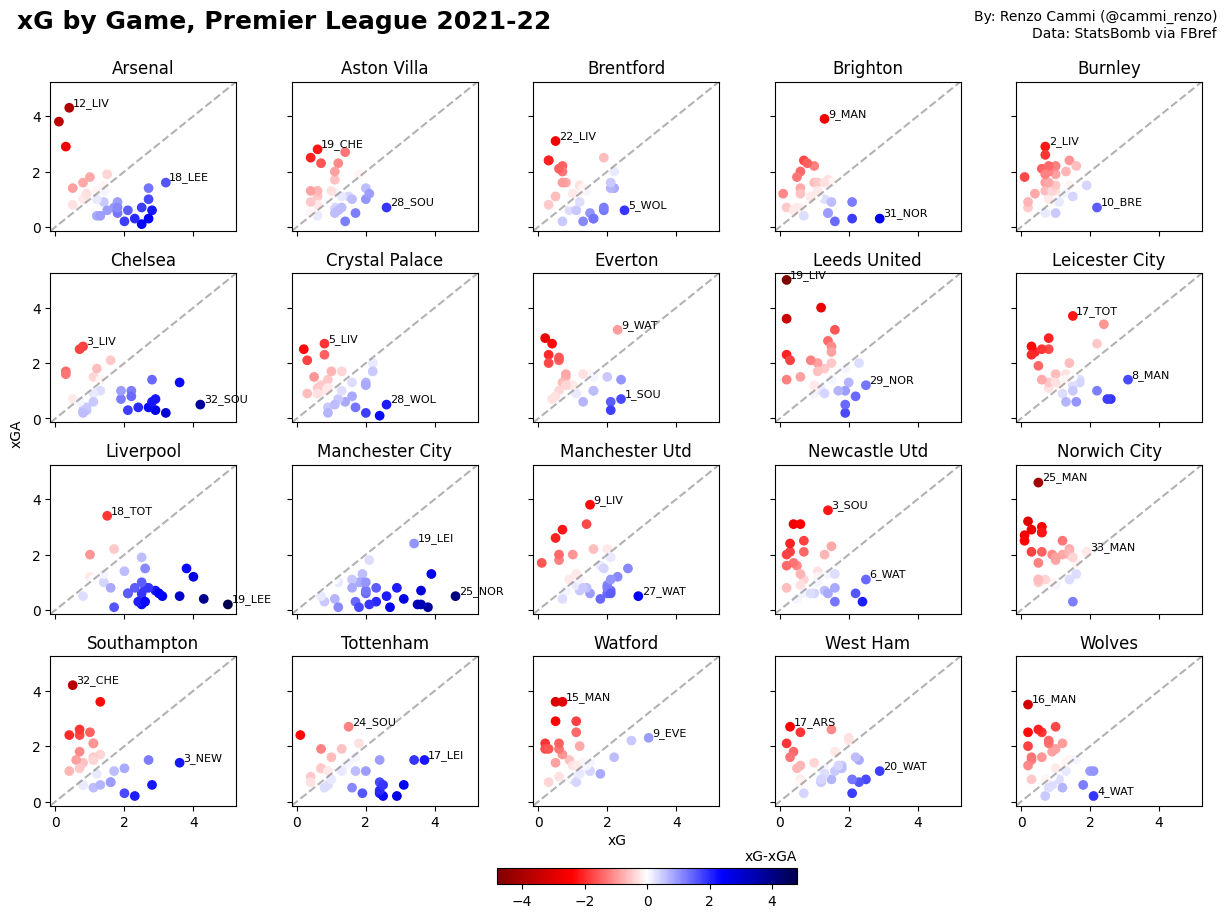

In [131]:
league = "Premier League"

data = only_league_filt[only_league_filt["Comp"] == league].reset_index().sort_values(by="Matchweek", ascending=True)

plt.style.use('default') 

#create figure
# counts how many teams there are in the df
# cols = 5
# rows = (len(data.index.unique()) // cols) + (len(data.index.unique()) % cols > 0) 
# #rows = 4

# open figure
fig, axes = plt.subplots(nrows=4, ncols=5,sharex=True, sharey=True, figsize=(12,8))
axes_list = [item for sublist in axes for item in sublist]

#plot main titles
plt.figtext(0,1.02,'xG by Game, {league} 2021-22'.format(league=league), fontsize=18, ha='left', weight='bold', color='black') # 1.01
#plt.figtext(0,1.0090, '{league} | Temporada 2020/21 | Dirección de ataque de izquierda a derecha'.format(league=league), fontsize=12, fontstyle='italic', ha='left', weight='bold', color=color) # 0.995

# plot credits
plt.figtext(1.0,1.03,'By: Renzo Cammi (@cammi_renzo)',
               ha='right',fontsize=10)
plt.figtext(1.0,1.0090,'Data: StatsBomb via FBref',
           ha='right', fontsize=10)

squadNames = sorted(list(data.squadName.unique()))

#Set color by xG dif and normalize by the max and min values.
colors = data['xG_dif'].values
normal = plt.Normalize(colors.min(), colors.max())
cmap='seismic_r'
        
for squad in squadNames:
    #selection = group.get_group(squad_data)
    #print(selection)
    data_squad = data[data["squadName"] == squad]

    ax = axes_list.pop(0)

    ax.set_title(squad, fontsize=12)

    x = data_squad.xG
    y = data_squad.xGA

    #cmap = 'seismic_r'
    im = ax.scatter(x, y, c=data_squad["xG_dif"], cmap=cmap, norm=normal) #, linewidth=5

    # get 3 outliers matches
    outliers_xG = data_squad.sort_values(by='xG', ascending=False).head(1)
    outliers_xGA = data_squad.sort_values(by='xGA', ascending=False).head(1)
    outliers = outliers_xG.append(outliers_xGA)

    for row in outliers.iterrows():
        ax.annotate(row[1]["Matchweek_rival"], (row[1].xG+0.1, row[1].xGA+0.1), fontsize=8, ha='left') #, va='bottom'
       #plt.figtext(row[1].xG, row[1].xGA, row[1]["Matchweek_rival"], ha='center', transform=ax.transData)

    ax.plot([0, 1], [0, 1], color='black', ls='--', alpha=0.30, transform=ax.transAxes)

for ax in axes_list:
    ax.remove()

# show color bar
cax = fig.add_axes([0.40, -0.05, 0.25, 0.02]) #, cax=cax
cb2 = fig.colorbar(im, cax=cax, cmap=cmap, orientation='horizontal') 
cax.set_title('xG-xGA', loc='right', fontsize=10)

# set labels
plt.figtext(0,0.5,'xGA', rotation=90, fontsize=10, ha='center', color='black')
plt.figtext(0.5,0,'xG', fontsize=10, ha='center', color='black')

#grid off
plt.grid(False)

#adjust subplots in the figure 
plt.tight_layout()

In [75]:
### check

# set colors by result of match
# big_frame.loc[big_frame["Result"] == 'W', 'color'] = 'g'
# big_frame.loc[big_frame["Result"] == 'D', 'color'] = 'b'
# big_frame.loc[big_frame["Result"] == 'L', 'color'] = 'r'
# big_frame.loc[big_frame["Notes"] == 'Match Postponed', ['Poss','Result','color']] = [0,'Match Postponed','y']

# crear big frame
# analizar big frame (valores nulos, incoherencias, cosas por corregir)
# plotear grafico con distintas variables y posibilidad de elegir liga

# get league squad
# squad_df = pd.read_html("https://fbref.com/en/comps/9/Premier-League-Stats#results111601_overall")[0]
# squad_df["Squad_dash"] = squad_df["Squad"].apply(lambda x: x.replace(" ","-"))
# squads = squad_df.Squad_dash.unique()

# print(squads)

# print (big_frame.tail())
# print (big_frame.shape)

# drop NA rows
# data = data.iloc[:29,:]

# print(data[["Round","Poss","Result","color"]])

# # plot scatter

# #set plot style
# plt.style.use('classic')

# plt.title("Aca va el titulo")

# ax = plt.scatter(x=data.Round, y=data.Poss, color=data.color)

# plt.xticks(rotation = 90)
# plt.grid(alpha=0.2)

# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles, labels)
# plt.show()